# Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score

# Data Loading and preprocessing

In [2]:
data=pd.read_excel("Survey on Universities.xlsx")
data.sample(5)

,Student ID,Timestamp,Student Name,University Name,NIRF Rank of University,Minimum Percentage to get the University seat,Intermediate Percentage,Eamcet Rank,University Fee,How are the placements Available,Rating for your University,Do Your University is having Extra curricular Activity,Do Your University is having Industry Evaluation Interaction,Hostel Availability,Hostel Fee,Hostel food Rating
47,48,2023-07-28 21:15:25.328,SRINIVAS MUKANAGAL,NAGARJUNA COLLEGE OF ENGINEERING AND TECHNOLOGY,152,60,Above 90,12000.0,250000,Good,1,YES,YES,YES,100000.0,3
61,62,2023-07-29 08:07:13.043,TEJESHWARI. D,NAGARJUNA COLLEGE OF ENGINEERING AND TECHNOLOGY,152,60,70,NaN,40000,Average,3,YES,NO,YES,100000.0,4
82,83,2023-08-01 14:32:39.973,SURENDRA,YV UNIVERSITY,80,50,80,5839.0,600000,Good,4,YES,YES,NO,0.0,4
8,9,2023-07-28 11:32:48.136,SOMA SEKHAR,AITS,88,80,80,500000.0,400000,Good,4,NO,YES,YES,5000000.0,3
22,23,2023-07-28 19:05:10.564,K.ROHITH,SRM UNIVERSITY,35,75,70,NaN,350000,Good,5,YES,YES,YES,140000.0,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Student ID                                                    101 non-null    int64         
 1   Timestamp                                                     101 non-null    datetime64[ns]
 2   Student Name                                                  101 non-null    object        
 3   University Name                                               101 non-null    object        
 4   NIRF Rank of University                                       101 non-null    int64         
 5   Minimum Percentage to get the University seat                 101 non-null    int64         
 6   Intermediate Percentage                                       101 non-null    object        
 7   Eamcet R

In [4]:
data.isnull().sum()

Student ID                                                       0
Timestamp                                                        0
Student Name                                                     0
University Name                                                  0
NIRF Rank of University                                          0
Minimum Percentage to get the University seat                    0
Intermediate Percentage                                          0
Eamcet Rank                                                     35
University Fee                                                   0
How are the placements Available                                 0
Rating for your University                                       0
Do Your University is having Extra curricular Activity           0
Do Your University is having Industry Evaluation Interaction     0
Hostel Availability                                              0
Hostel Fee                                                    

In [5]:
data['Eamcet Rank']=data['Eamcet Rank'].fillna(data['Eamcet Rank'].median())
data['Hostel Fee']=data['Hostel Fee'].fillna(data['Hostel Fee'].median())

In [6]:
data["Intermediate Percentage"]

0      Above 90
1            80
2            80
3            80
4      Above 90
         ...   
96           60
97           60
98           80
99           60
100          70
Name: Intermediate Percentage, Length: 101, dtype: object

In [7]:
data=data.replace({'Intermediate Percentage':{"Above 90":np.random.randint(90,99),80:80,70:70,60:60,50:50}})

In [8]:
data.isnull().sum()

Student ID                                                      0
Timestamp                                                       0
Student Name                                                    0
University Name                                                 0
NIRF Rank of University                                         0
Minimum Percentage to get the University seat                   0
Intermediate Percentage                                         0
Eamcet Rank                                                     0
University Fee                                                  0
How are the placements Available                                0
Rating for your University                                      0
Do Your University is having Extra curricular Activity          0
Do Your University is having Industry Evaluation Interaction    0
Hostel Availability                                             0
Hostel Fee                                                      0
Hostel foo

In [9]:
data1=data

In [10]:
data1.head()

,Student ID,Timestamp,Student Name,University Name,NIRF Rank of University,Minimum Percentage to get the University seat,Intermediate Percentage,Eamcet Rank,University Fee,How are the placements Available,Rating for your University,Do Your University is having Extra curricular Activity,Do Your University is having Industry Evaluation Interaction,Hostel Availability,Hostel Fee,Hostel food Rating
0,1,2023-07-28 10:52:19.364,NIKHIL,KALASALINGAM ACADEMY OF REASEARCH AND EDUCATION,48,80,96,24000.0,62500,Good,4,YES,YES,YES,71000.0,3
1,2,2023-07-28 11:11:33.007,C SAI PRATHAP REDDY,KALASALINGAM ACADEMY OF REASEARCH AND EDUCATION,48,80,80,27500.0,100000,Good,4,YES,YES,YES,65500.0,4
2,3,2023-07-28 11:23:41.131,GOKUL,SAVEETHA SCHOOL OF ENGINEERING,27,70,80,27500.0,110000,Good,4,YES,YES,YES,110000.0,5
3,4,2023-07-28 11:25:29.124,K V SREE DHARANI,MOHAN BABU UNIVERSITY,165,45,80,50000.0,200000,Good,3,YES,NO,YES,70000.0,3
4,5,2023-07-28 11:25:58.998,KASUVU PRAVEENKUMAR,ANNAMACHARYA INSTITUTE OF TECHNOLOGY,88,70,96,90000.0,39000,Good,1,YES,YES,YES,78000.0,2


# Exploratory Data Analysis and Visulization

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Minimum Percentage to get the University seat', ylabel='Density'>

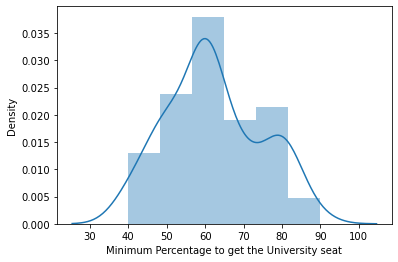

In [11]:
sns.distplot(data['Minimum Percentage to get the University seat'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='University Fee', ylabel='Density'>

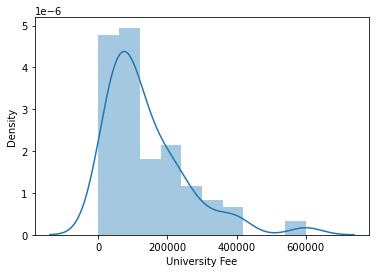

In [12]:
sns.distplot(data['University Fee'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hostel Fee', ylabel='Density'>

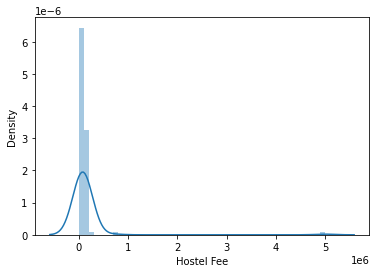

In [13]:
sns.distplot(data['Hostel Fee'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Eamcet Rank', ylabel='Density'>

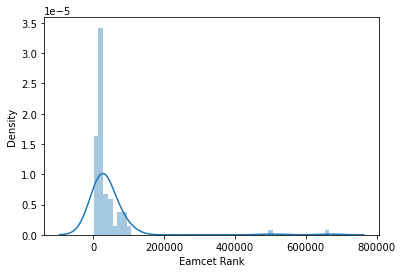

In [14]:
sns.distplot(data['Eamcet Rank'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Intermediate Percentage', ylabel='Density'>

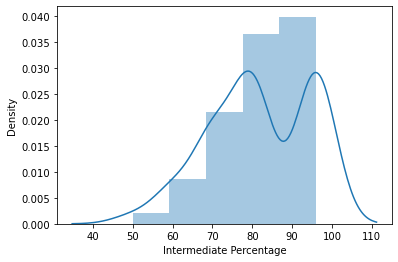

In [15]:
sns.distplot(data['Intermediate Percentage'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='How are the placements Available ', ylabel='count'>

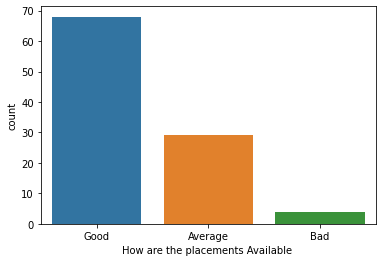

In [16]:
sns.countplot(data["How are the placements Available "])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Do Your University is having Extra curricular Activity ', ylabel='count'>

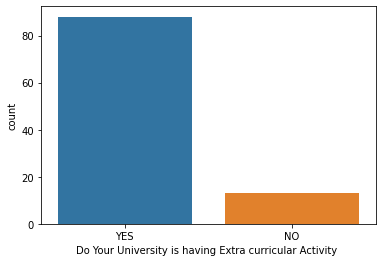

In [17]:
sns.countplot(data["Do Your University is having Extra curricular Activity "])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Do Your University is having Industry Evaluation Interaction', ylabel='count'>

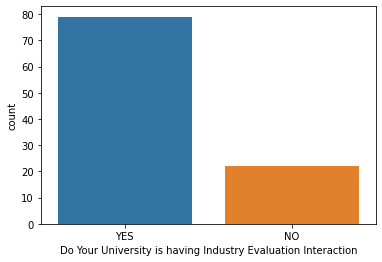

In [18]:
sns.countplot(data["Do Your University is having Industry Evaluation Interaction"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hostel Availability', ylabel='count'>

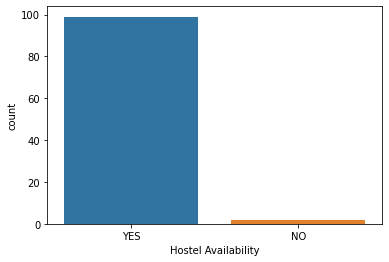

In [19]:
sns.countplot(data["Hostel Availability"])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'violin plot')]

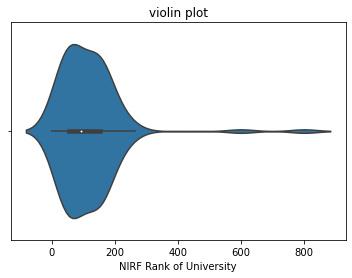

In [20]:
sns.violinplot(data["NIRF Rank of University"]).set(title="violin plot")

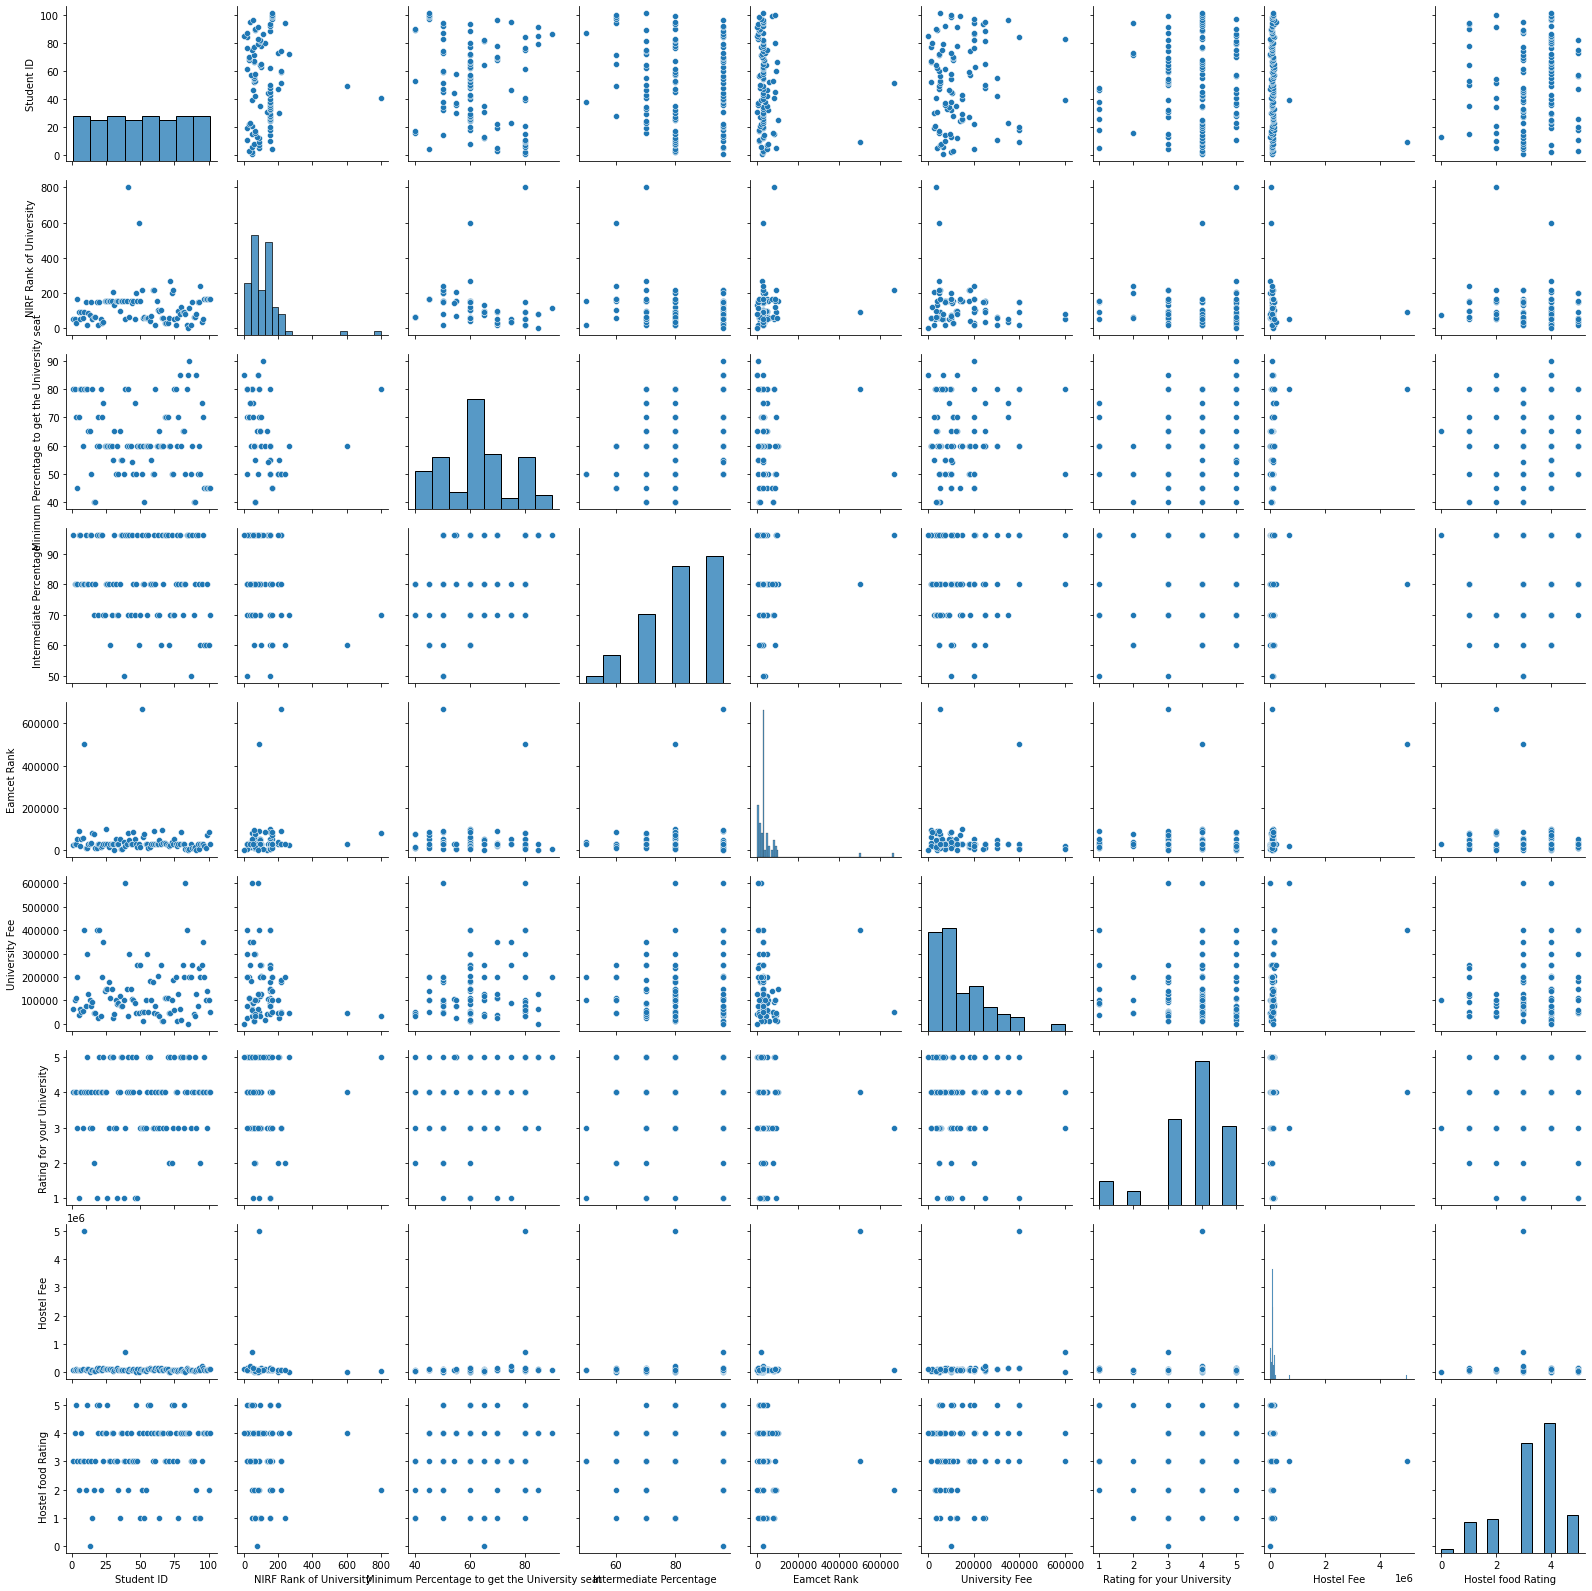

In [21]:
sns.pairplot(data=data)

[Text(0.5, 1.0, 'Histogram')]

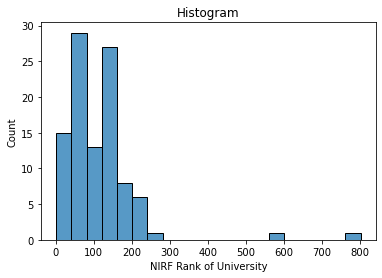

In [22]:
sns.histplot(data["NIRF Rank of University"]).set(title="Histogram")

In [23]:
df=data

In [24]:
df.sample(5)

,Student ID,Timestamp,Student Name,University Name,NIRF Rank of University,Minimum Percentage to get the University seat,Intermediate Percentage,Eamcet Rank,University Fee,How are the placements Available,Rating for your University,Do Your University is having Extra curricular Activity,Do Your University is having Industry Evaluation Interaction,Hostel Availability,Hostel Fee,Hostel food Rating
84,85,2023-08-01 14:38:05.128,KALYAN RAM,IIT MADRAS,1,85,96,1200.0,0,Good,5,YES,YES,YES,100000.0,4
7,8,2023-07-28 11:31:43.884,VALLURU GAFOOR,JNTUA,58,60,80,55000.0,55000,Good,3,YES,YES,YES,100000.0,3
4,5,2023-07-28 11:25:58.998,KASUVU PRAVEENKUMAR,ANNAMACHARYA INSTITUTE OF TECHNOLOGY,88,70,96,90000.0,39000,Good,1,YES,YES,YES,78000.0,2
35,36,2023-07-28 19:51:53.977,TANMAI,RAYALASEEMA UNIVERSITY,151,55,96,6000.0,75000,Good,5,YES,YES,YES,60000.0,4
14,15,2023-07-28 12:04:58.727,SHAIK NAGURVALI,KALASALINGAM ACADEMY OF REASEARCH AND EDUCATION,48,80,80,80000.0,95000,Average,3,YES,YES,YES,80000.0,1


# Log Transformation

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Minimum Percentage to get the University seat Log', ylabel='Density'>

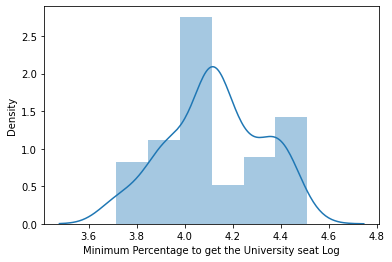

In [25]:
data['Minimum Percentage to get the University seat Log']=np.log(data['Minimum Percentage to get the University seat']+1)
sns.distplot(data['Minimum Percentage to get the University seat Log'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='University Fee Log', ylabel='Density'>

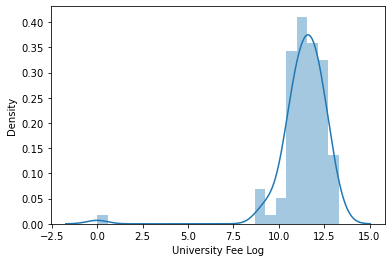

In [26]:
data['University Fee Log']=np.log(data['University Fee']+1)
sns.distplot(data['University Fee Log'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hostel Fee Log', ylabel='Density'>

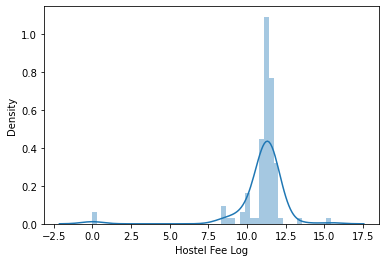

In [27]:
data['Hostel Fee Log']=np.log(data['Hostel Fee']+1)
sns.distplot(data['Hostel Fee Log'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Eamcet Rank Log', ylabel='Density'>

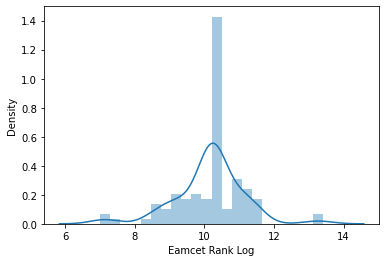

In [28]:
data['Eamcet Rank Log']=np.log(data['Eamcet Rank']+1)
sns.distplot(data['Eamcet Rank Log'])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Intermediate Percentage Log', ylabel='Density'>

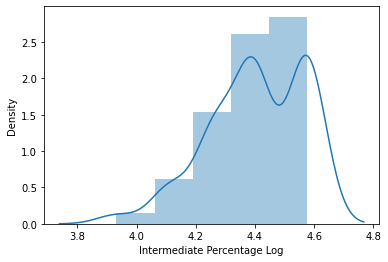

In [29]:
data['Intermediate Percentage Log']=np.log(data['Intermediate Percentage']+1)
sns.distplot(data['Intermediate Percentage Log'])

# Correlation Matrix

<AxesSubplot:>

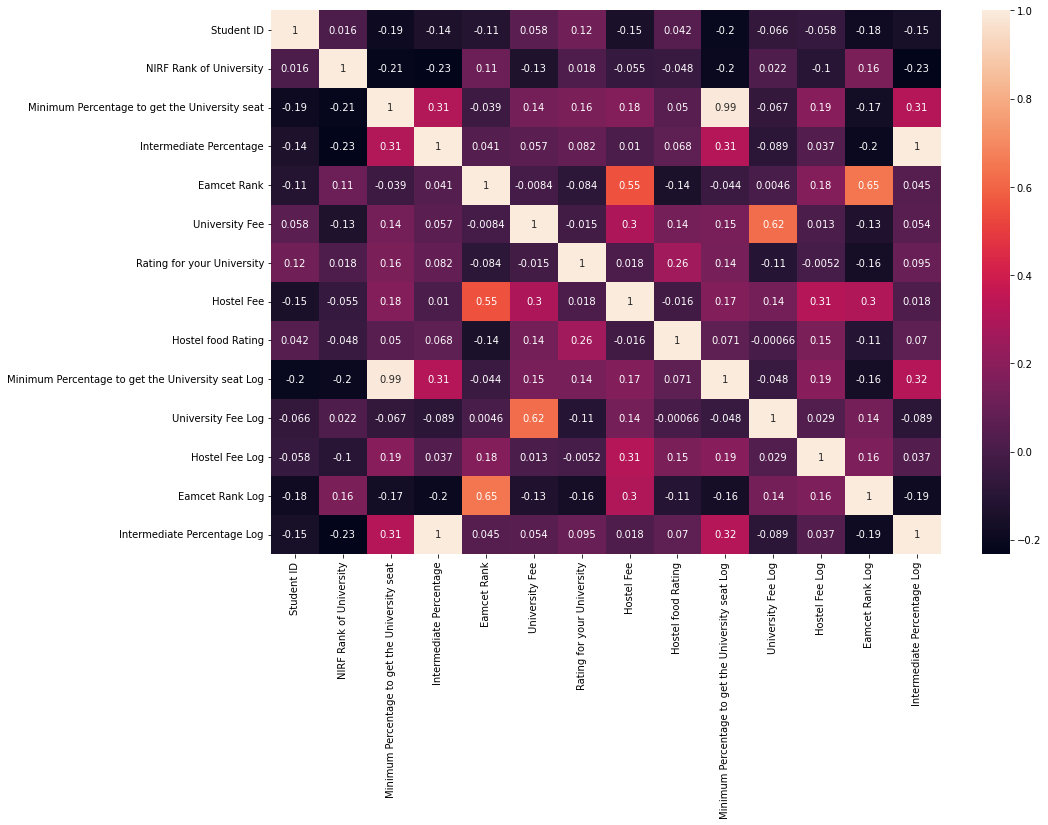

In [30]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [31]:
cols=['Student ID','Minimum Percentage to get the University seat','Timestamp','Student Name','University Name',
      'NIRF Rank of University','Rating for your University','Hostel food Rating',
      'Minimum Percentage to get the University seat Log']
df=df.drop(columns=cols)
df.sample(5)

,Intermediate Percentage,Eamcet Rank,University Fee,How are the placements Available,Do Your University is having Extra curricular Activity,Do Your University is having Industry Evaluation Interaction,Hostel Availability,Hostel Fee,University Fee Log,Hostel Fee Log,Eamcet Rank Log,Intermediate Percentage Log
3,80,50000.0,200000,Good,YES,NO,YES,70000.0,12.206078,11.156265,10.819798,4.394449
70,60,20000.0,45000,Good,YES,YES,YES,5000.0,10.714440,8.517393,9.903538,4.110874
89,80,16000.0,35000,Good,YES,YES,YES,20000.0,10.463132,9.903538,9.680406,4.394449
77,80,27500.0,125000,Average,YES,YES,YES,60000.0,11.736077,11.002117,10.221978,4.394449
67,96,31459.0,110000,Good,YES,NO,YES,105000.0,11.608245,11.561725,10.356472,4.574711


# Label Encoding

In [32]:
cols=['How are the placements Available ','Do Your University is having Extra curricular Activity ',
      'Do Your University is having Industry Evaluation Interaction','Hostel Availability']
le=LabelEncoder()
for c in cols:
    df[c]=le.fit_transform(df[c])
df.sample(5)

,Intermediate Percentage,Eamcet Rank,University Fee,How are the placements Available,Do Your University is having Extra curricular Activity,Do Your University is having Industry Evaluation Interaction,Hostel Availability,Hostel Fee,University Fee Log,Hostel Fee Log,Eamcet Rank Log,Intermediate Percentage Log
92,80,4563.0,240000,0,1,1,1,150000.0,12.388398,11.918397,8.425955,4.394449
54,70,27500.0,300000,2,1,0,1,100000.0,12.611541,11.512935,10.221978,4.262680
19,96,27500.0,400000,2,1,1,1,150000.0,12.899222,11.918397,10.221978,4.574711
79,80,87000.0,15000,0,0,0,1,90000.0,9.615872,11.407576,11.373675,4.394449
40,70,80000.0,35000,0,1,1,1,20000.0,10.463132,9.903538,11.289794,4.262680


In [33]:
X=df.drop(columns=['How are the placements Available '])
Y=df['How are the placements Available ']


# Train and Test Split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,random_state=0,test_size=0.2)

# Train and Test Model

In [35]:
def model_Train(model,x,y):
    model.fit(x,y)
    yp=model.predict(x)
    from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
    cm = confusion_matrix(y, yp)
    sns.heatmap(cm,annot=True)
    accuracy = accuracy_score(y,yp)*100
    print('Training Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

    recall = recall_score(y,yp, labels=[1,2], average='micro')
    print('Train_Recall: %.3f' % recall)

    precision = precision_score(y,yp, labels=[1,2], average='micro')
    print('Train_Precision: %.3f' % precision)

    score = f1_score(y,yp, labels=[1,2], average='micro')
    print('Train_F1-Measure: %.3f' % score)


In [36]:
def model_Test(model,x,y_test):
  model = model
  model.fit(x,y_test)
  y_pred = model.predict(x)

  from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm,annot=True)

  accuracy = accuracy_score(y_test, y_pred)*100
  print('Testing Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

  recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
  print('Recall: %.3f' % recall)

  precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
  print('Precision: %.3f' % precision)

  score = f1_score(y_test, y_pred, labels=[1,2], average='micro')
  print('F1-Measure: %.3f' % score)

Training Accuracy of our model is equal 66.25 %.
Train_Recall: 0.927
Train_Precision: 0.671
Train_F1-Measure: 0.779


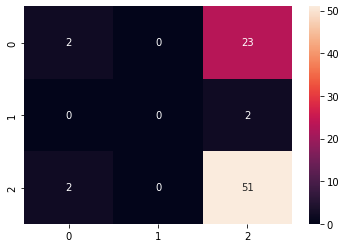

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 71.43 %.
Recall: 0.765
Precision: 0.722
F1-Measure: 0.743


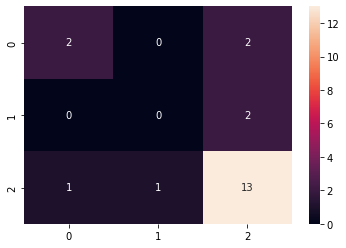

In [38]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 75.0 %.
Train_Recall: 0.873
Train_Precision: 0.774
Train_F1-Measure: 0.821


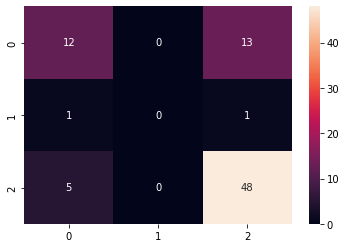

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 71.43 %.
Recall: 0.882
Precision: 0.714
F1-Measure: 0.789


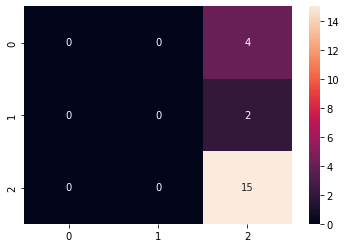

In [40]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 71.25 %.
Train_Recall: 0.945
Train_Precision: 0.703
Train_F1-Measure: 0.806


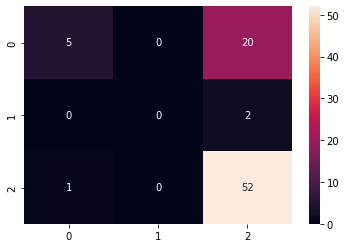

In [41]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model =ExtraTreesClassifier (n_estimators=1000, min_samples_split=25, max_depth=7, max_features=1)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 71.43 %.
Recall: 0.882
Precision: 0.714
F1-Measure: 0.789


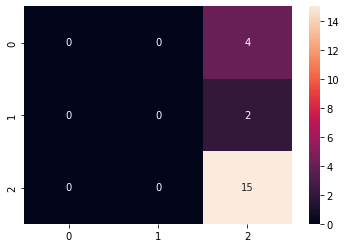

In [42]:
model_Test(model,x_test,y_test)

Training Accuracy of our model is equal 75.0 %.
Train_Recall: 0.945
Train_Precision: 0.732
Train_F1-Measure: 0.825


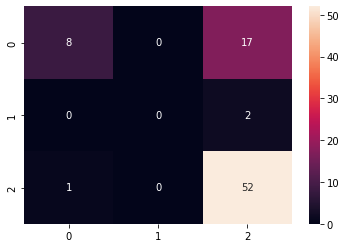

In [43]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=25, max_depth=7, max_features=1)
model_Train(model,x_train,y_train)

Testing Accuracy of our model is equal 71.43 %.
Recall: 0.882
Precision: 0.714
F1-Measure: 0.789


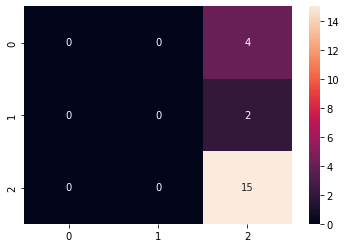

In [44]:
model_Test(model,x_test,y_test)

In [45]:
p=model.predict(X)
df['Prediction on placements']=p

In [46]:
df

,Intermediate Percentage,Eamcet Rank,University Fee,How are the placements Available,Do Your University is having Extra curricular Activity,Do Your University is having Industry Evaluation Interaction,Hostel Availability,Hostel Fee,University Fee Log,Hostel Fee Log,Eamcet Rank Log,Intermediate Percentage Log,Prediction on placements
0,96,24000.0,62500,2,1,1,1,71000.0,11.042938,11.170449,10.085851,4.574711,2
1,80,27500.0,100000,2,1,1,1,65500.0,11.512935,11.089821,10.221978,4.394449,2
2,80,27500.0,110000,2,1,1,1,110000.0,11.608245,11.608245,10.221978,4.394449,2
3,80,50000.0,200000,2,1,0,1,70000.0,12.206078,11.156265,10.819798,4.394449,2
4,96,90000.0,39000,2,1,1,1,78000.0,10.571343,11.264477,11.407576,4.574711,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,60,20140.0,200000,2,1,0,1,50000.0,12.206078,10.819798,9.910513,4.110874,2
97,60,10000.0,100000,2,0,0,1,50000.0,11.512935,10.819798,9.210440,4.110874,2
98,80,70216.0,140000,2,0,0,1,80000.0,11.849405,11.289794,11.159346,4.394449,2
99,60,85000.0,100000,0,1,1,1,85000.0,11.512935,11.350418,11.350418,4.110874,2


In [47]:
data['Prediction on placements']=p

In [48]:
data=data.replace({'Prediction on placements':{2:'Good',1:'Bad',0:'Average'}})

In [49]:
data.sample(5)

,Student ID,Timestamp,Student Name,University Name,NIRF Rank of University,Minimum Percentage to get the University seat,Intermediate Percentage,Eamcet Rank,University Fee,How are the placements Available,...,Do Your University is having Industry Evaluation Interaction,Hostel Availability,Hostel Fee,Hostel food Rating,Minimum Percentage to get the University seat Log,University Fee Log,Hostel Fee Log,Eamcet Rank Log,Intermediate Percentage Log,Prediction on placements
26,27,2023-07-28 19:24:07.343,S CHITHRANJAN,NAGARJUNA COLLEGE OF ENGINEERING AND TECHNOLOGY,152,60,80,13000.0,180000,Average,...,YES,YES,110000.0,3,4.110874,12.100718,11.608245,9.472782,4.394449,Good
97,98,2023-08-05 12:40:49.236,GURU,MOHAN BABU UNIVERSITY,165,45,60,10000.0,100000,Good,...,NO,YES,50000.0,4,3.828641,11.512935,10.819798,9.210440,4.110874,Good
58,59,2023-07-28 22:37:32.760,BALAJI,SRI VENKATESWARA COLLEGE OF ENGINEERING AND TE...,217,50,80,27500.0,180000,Average,...,NO,YES,70000.0,3,3.931826,12.100718,11.156265,10.221978,4.394449,Good
45,46,2023-07-28 21:00:59.238,VAISHNAVI.C,VISHWESHWARAIAH UNIVERSITY,52,75,70,50000.0,90000,Good,...,YES,YES,80000.0,3,4.330733,11.407576,11.289794,10.819798,4.262680,Good
46,47,2023-07-28 21:05:27.897,EDAGOTTU GANESH,MADANAPALLE INSTITUTE OF TECHNOLOGY AND SCIENCE,200,50,80,27000.0,45000,Good,...,YES,YES,5000.0,5,3.931826,10.714440,8.517393,10.203629,4.394449,Good


In [50]:
df.sample()

,Intermediate Percentage,Eamcet Rank,University Fee,How are the placements Available,Do Your University is having Extra curricular Activity,Do Your University is having Industry Evaluation Interaction,Hostel Availability,Hostel Fee,University Fee Log,Hostel Fee Log,Eamcet Rank Log,Intermediate Percentage Log,Prediction on placements
23,70,27500.0,140000,2,1,1,1,100000.0,11.849405,11.512935,10.221978,4.26268,2


In [51]:
I=int(input('Enter your Intermediate Percentage:'))
E=int(input('Enter your Eamcet Rank: [If not written enter 0] :'))
UF=int(input('Maximum Fee u can pay for university:'))
ECA=input('Do u need Extra curricular Activity-Yes/No:')
IE=input('Do u need Industry Evaluation Interaction-Yes/No:')
H=input('Reqired to stay in hostel-Yes/No:')
HF=int(input('Maximum Hostel Fee u can pay if hostel not required enter 0:'))
UFL=np.log(UF)
HFL=np.log(HF)
ERL=np.log(E)
IPL=np.log(I)
d1=pd.DataFrame({'Intermediate Percentage':[I],'Eamcet Rank':[E],'University Fee':[UF],'Extra curricular Activity':[ECA],
                 'Industry Evaluation':[IE],'Hostel required':[H],'Hostel Fee':[HF],'University Fee Log':[UFL],
                 'Hostel Fee Log':[HFL],'Eamcet Rank Log':[ERL],'Intermediate Percentage Log':[IPL]})

Enter your Intermediate Percentage:90
Enter your Eamcet Rank: [If not written enter 0] :17000
Maximum Fee u can pay for university:100000
Do u need Extra curricular Activity-Yes/No:Yes
Do u need Industry Evaluation Interaction-Yes/No:Yes
Reqired to stay in hostel-Yes/No:Yes
Maximum Hostel Fee u can pay if hostel not required enter 0:60000


In [52]:
d1

,Intermediate Percentage,Eamcet Rank,University Fee,Extra curricular Activity,Industry Evaluation,Hostel required,Hostel Fee,University Fee Log,Hostel Fee Log,Eamcet Rank Log,Intermediate Percentage Log
0,90,17000,100000,Yes,Yes,Yes,60000,11.512925,11.0021,9.740969,4.49981


In [53]:
from sklearn.preprocessing import LabelEncoder
cols=['Extra curricular Activity','Industry Evaluation','Hostel required']
le=LabelEncoder()
for c in cols:
    d1[c]=le.fit_transform(d1[c])
d1

,Intermediate Percentage,Eamcet Rank,University Fee,Extra curricular Activity,Industry Evaluation,Hostel required,Hostel Fee,University Fee Log,Hostel Fee Log,Eamcet Rank Log,Intermediate Percentage Log
0,90,17000,100000,0,0,0,60000,11.512925,11.0021,9.740969,4.49981


In [54]:
p=model.predict(d1)
d1['Prediction on placements']=p

C:\Users\venka\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Extra curricular Activity
- Hostel required
- Industry Evaluation
Feature names seen at fit time, yet now missing:
- Do Your University is having Extra curricular Activity 
- Do Your University is having Industry Evaluation Interaction
- Hostel Availability

  warnings.warn(message, FutureWarning)


In [55]:
u=[]
uf=[]
nirf=[]
mi=[]
r=[]
h=[]
hf=[]
hrf=[]
for i in range(101):
    if ((data1['Minimum Percentage to get the University seat'][i]<=I) & (data1['Eamcet Rank'][i]<=E)
        & (data1['University Fee'][i]<=UF) & (data1['Hostel Availability'][i]==H.upper()) & (data1['Hostel Fee'][i]<=HF)):
        u.append(data['University Name'][i])
        uf.append(data['University Fee'][i])
        nirf.append(data['NIRF Rank of University'][i])
        mi.append(data['Minimum Percentage to get the University seat'][i])
        r.append(data['Rating for your University'][i])
        h.append(data['Hostel Availability'][i])
        hf.append(data['Hostel Fee'][i])
        hrf.append(data['Hostel food Rating'][i])
d2=pd.DataFrame({'University Name':u,'University Fee':uf,
                'NIRF Rank of University':nirf,'Minimum Percentage to get the University seat': mi,
               'Rating for your University':r,'Hostel Availability':h
                 ,'Hostel Fee':hf
                ,'Hostel food Rating':hrf})

In [56]:
d2

,University Name,University Fee,NIRF Rank of University,Minimum Percentage to get the University seat,Rating for your University,Hostel Availability,Hostel Fee,Hostel food Rating
0,ACHARAYA NAGARJUNA UNIVERSITY,45000,64,40,4,YES,15000.0,3
1,KALASALINGAM ACADEMY OF REASEARCH AND EDUCATION,31250,48,80,4,YES,55500.0,2
2,RAYALASEEMA UNIVERSITY,75000,151,55,5,YES,60000.0,4
3,RAYALASEEMA UNIVERSITY,75000,151,55,5,YES,60000.0,4
4,ACHARAYA NAGARJUNA UNIVERSITY,40000,64,40,4,YES,20000.0,3
5,ACHARAYA NAGARJUNA UNIVERSITY,35000,64,40,5,YES,20000.0,1
6,MOHAN BABU UNIVERSITY,100000,165,45,4,YES,50000.0,4


In [57]:
d1=d1.replace({'Prediction on placements':{2:'Good',1:'Bad',0:'Average'}})

In [58]:
d1

,Intermediate Percentage,Eamcet Rank,University Fee,Extra curricular Activity,Industry Evaluation,Hostel required,Hostel Fee,University Fee Log,Hostel Fee Log,Eamcet Rank Log,Intermediate Percentage Log,Prediction on placements
0,90,17000,100000,0,0,0,60000,11.512925,11.0021,9.740969,4.49981,Good


In [59]:
print("Your Placement with these details can be:",d1['Prediction on placements'])

Your Placement with these details can be: 0    Good
Name: Prediction on placements, dtype: object
